In [1]:
import pandas as pd

In [53]:
!pip install imbalanced-learn

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif, mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
# from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
credit=pd.read_csv('transactions.csv')

In [9]:
credit.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
#dataset

In [11]:
credit

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,1.037676,-0.328842,0.630849,-0.332018,0.118286,-0.174989,0.463274,-0.197777,0.516110,...,-0.220425,-0.769076,0.107025,0.719345,0.271047,0.227937,-0.264337,-0.025433,1482.71,0
15996,15996,-0.206451,-0.636970,1.365015,-0.182187,1.327233,-0.121329,0.425372,-0.186223,0.211455,...,-0.006945,0.499543,0.034423,-0.421402,-0.426955,-0.748720,-0.262459,-0.183282,15490.85,0
15997,15997,0.899676,-0.666471,1.214826,-0.552236,-0.146267,0.614255,0.157385,-0.053909,1.346437,...,-0.165799,-0.314291,0.112510,0.531622,-0.180552,1.891328,-0.277213,-0.097811,9936.58,0
15998,15998,1.029892,-0.388572,0.738830,-0.354546,0.054584,-0.137337,0.438165,-0.188349,0.600396,...,-0.210092,-0.755371,0.119611,0.758240,0.221993,0.232003,-0.278440,-0.055396,5484.48,0


In [16]:
#information about dataset

In [12]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      16000 non-null  int64  
 1   V1      16000 non-null  float64
 2   V2      16000 non-null  float64
 3   V3      16000 non-null  float64
 4   V4      16000 non-null  float64
 5   V5      16000 non-null  float64
 6   V6      16000 non-null  float64
 7   V7      16000 non-null  float64
 8   V8      16000 non-null  float64
 9   V9      16000 non-null  float64
 10  V10     16000 non-null  float64
 11  V11     16000 non-null  float64
 12  V12     16000 non-null  float64
 13  V13     16000 non-null  float64
 14  V14     16000 non-null  float64
 15  V15     16000 non-null  float64
 16  V16     16000 non-null  float64
 17  V17     16000 non-null  float64
 18  V18     16000 non-null  float64
 19  V19     16000 non-null  float64
 20  V20     16000 non-null  float64
 21  V21     16000 non-null  float64
 22

In [17]:
# describing dataset

In [13]:
credit.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,...,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,7999.500000,0.309177,-0.388077,1.131049,-0.599374,0.278252,0.498203,0.432146,-0.142461,1.185669,...,-0.134809,-0.170232,-0.050679,0.147090,0.124447,-0.005548,-0.195342,-0.086425,11898.634475,0.004562
std,4618.946489,0.623014,0.578033,0.741488,0.672614,0.694813,0.733289,0.472843,0.280962,0.962033,...,0.310828,0.555348,0.528398,1.091879,0.709479,1.204740,0.462631,0.612924,6929.817509,0.067394
min,0.000000,-2.543593,-25.480046,-2.343357,-4.468314,-4.298320,-18.642598,-3.038728,-4.074350,-2.170915,...,-5.775451,-6.262872,-19.297443,-3.674306,-10.230967,-3.733169,-5.536809,-8.923980,50.410000,0.000000
25%,3999.750000,-0.153426,-0.545168,0.669915,-0.949455,0.006463,0.095077,0.247619,-0.192528,0.532405,...,-0.212528,-0.538544,-0.196843,-0.571549,-0.309120,-0.852456,-0.320416,-0.131865,5885.292500,0.000000
50%,7999.500000,0.066186,-0.362175,1.041545,-0.520995,0.183339,0.382798,0.404756,-0.148520,1.072291,...,-0.154492,-0.157954,-0.068693,0.153168,0.171770,-0.047629,-0.236473,-0.057407,11759.390000,0.000000
75%,11999.250000,0.960405,-0.163192,1.548970,-0.152294,0.399555,0.753905,0.596601,-0.091155,1.644821,...,-0.092068,0.172446,0.050261,0.834447,0.569269,0.785994,-0.120483,0.084733,17911.427500,0.000000
max,15999.000000,1.695400,2.959661,4.440555,2.360359,41.540257,9.295606,37.922674,4.961058,12.171681,...,6.834415,4.929620,18.418155,9.978778,10.424231,5.623285,17.987212,11.375357,24039.880000,1.000000


In [ ]:
# checking corelation

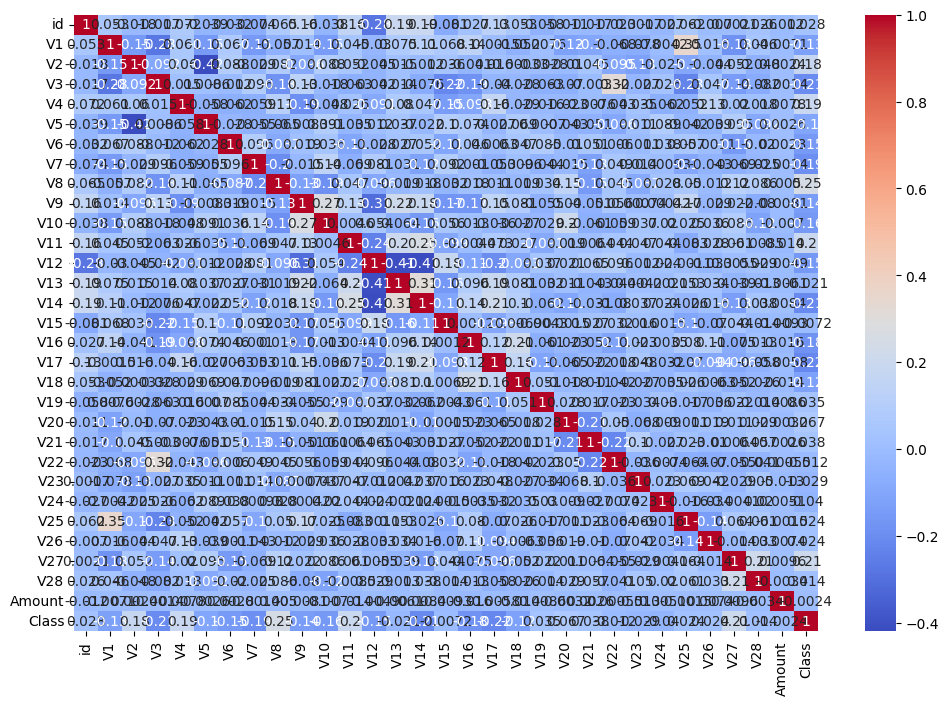

In [19]:
correlation_matrix = credit.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [20]:
#the above method was hard to interpret

In [139]:
# CALCULATING MUTUAL INFORMATION BETWEEN FEATURE AD TARGET

In [31]:
X = credit.drop(columns=['Class'])  # Exclude the target column
y = credit['Class']  # Target column

In [26]:
# Calculate Mutual Information
mutual_info = mutual_info_classif(X, y)
mutual_info_results = pd.DataFrame({'Feature': X.columns, 'Mutual_Info': mutual_info})
mutual_info_results = mutual_info_results.sort_values(by='Mutual_Info', ascending=False)
mut_info=pd.DataFrame(mutual_info_results)

In [27]:
mut_info

,Feature,Mutual_Info
12,V12,0.023187
10,V10,0.021799
14,V14,0.021637
11,V11,0.021235
17,V17,0.020005
4,V4,0.019287
3,V3,0.018135
9,V9,0.016897
16,V16,0.016792
7,V7,0.014421


In [25]:
# Select the Top N Features

In [28]:
# Sort by Mutual Information in descending order
top_features = mut_info.sort_values(by='Mutual_Info', ascending=False).head(10)

# Get the selected feature names
selected_features = top_features['Feature'].tolist()

print("Top 10 Features based on Mutual Information:")
print(selected_features)

Top 10 Features based on Mutual Information:
['V12', 'V10', 'V14', 'V11', 'V17', 'V4', 'V3', 'V9', 'V16', 'V7']


In [30]:
# checking for multi colinerity

In [32]:

# Assuming your features are stored in X
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results sorted by value
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print("VIF Results:\n", vif_data)

VIF Results:
    Feature       VIF
14     V14  4.858975
9       V9  4.252083
3       V3  4.103479
0       id  3.964757
17     V17  3.722528
29  Amount  3.446602
16     V16  2.659322
2       V2  2.308253
10     V10  2.291589
4       V4  2.185306
7       V7  2.184595
13     V13  2.172361
1       V1  2.104517
5       V5  1.831958
18     V18  1.663956
6       V6  1.643722
8       V8  1.607842
21     V21  1.520060
11     V11  1.506466
12     V12  1.486515
27     V27  1.481260
25     V25  1.475604
22     V22  1.403272
15     V15  1.315161
20     V20  1.279250
19     V19  1.268963
28     V28  1.152852
26     V26  1.128314
23     V23  1.118294
24     V24  1.049747


In [33]:
#  since none of my features have VIF >5 all features doesnt have multuicolinerity

In [34]:
#creating filtered final dataframe containing features and target

In [35]:
final_data=pd.DataFrame(credit[selected_features])

In [37]:
final_data

,V12,V10,V14,V11,V17,V4,V3,V9,V16,V7
0,0.293438,0.637735,0.549020,-0.987020,0.512307,-0.083724,2.496266,0.727159,0.215598,0.519014
1,1.564246,0.529808,0.627719,0.140107,0.403810,-0.429654,0.558056,0.347452,0.789188,0.406466
2,0.659201,0.690708,0.616874,-0.272985,0.886526,-0.457986,1.728538,-0.261297,-0.577514,0.743511
3,0.737483,0.575231,0.559535,-0.752581,0.242629,-1.090178,1.746840,-0.205698,-0.030669,0.518269
4,1.029577,0.968046,0.241454,-1.203171,0.366466,-0.448293,1.527053,1.049921,0.224538,0.658849
...,...,...,...,...,...,...,...,...,...,...
15995,0.771814,0.484971,0.561107,-0.652455,0.438588,-0.332018,0.630849,0.516110,0.802594,0.463274
15996,0.851023,0.622000,0.720220,-0.875824,0.387817,-0.182187,1.365015,0.211455,0.124395,0.425372
15997,0.957595,0.486028,0.726077,-0.103651,0.564989,-0.552236,1.214826,1.346437,0.356728,0.157385
15998,0.570478,0.579548,0.948808,-0.843120,0.326410,-0.354546,0.738830,0.600396,0.696648,0.438165


In [41]:
cred_data=pd.concat([final_data,credit['Class']],axis=1)

In [42]:
cred_data

,V12,V10,V14,V11,V17,V4,V3,V9,V16,V7,Class
0,0.293438,0.637735,0.549020,-0.987020,0.512307,-0.083724,2.496266,0.727159,0.215598,0.519014,0
1,1.564246,0.529808,0.627719,0.140107,0.403810,-0.429654,0.558056,0.347452,0.789188,0.406466,0
2,0.659201,0.690708,0.616874,-0.272985,0.886526,-0.457986,1.728538,-0.261297,-0.577514,0.743511,0
3,0.737483,0.575231,0.559535,-0.752581,0.242629,-1.090178,1.746840,-0.205698,-0.030669,0.518269,0
4,1.029577,0.968046,0.241454,-1.203171,0.366466,-0.448293,1.527053,1.049921,0.224538,0.658849,0
...,...,...,...,...,...,...,...,...,...,...,...
15995,0.771814,0.484971,0.561107,-0.652455,0.438588,-0.332018,0.630849,0.516110,0.802594,0.463274,0
15996,0.851023,0.622000,0.720220,-0.875824,0.387817,-0.182187,1.365015,0.211455,0.124395,0.425372,0
15997,0.957595,0.486028,0.726077,-0.103651,0.564989,-0.552236,1.214826,1.346437,0.356728,0.157385,0
15998,0.570478,0.579548,0.948808,-0.843120,0.326410,-0.354546,0.738830,0.600396,0.696648,0.438165,0


In [123]:
# VISUALIZATION

In [124]:
# bar plot

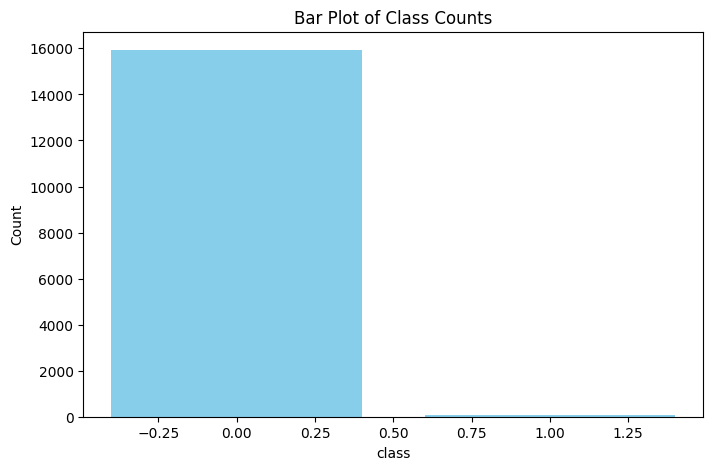

In [126]:
# Calculate counts for each category
class_counts = cred_data['Class'].value_counts()

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel('class')
plt.ylabel('Count')
plt.title('Bar Plot of Class Counts')
plt.show()

In [43]:
#over sampling

In [58]:
cred_data['Class'].value_counts()

Class
0    15927
1       73
Name: count, dtype: int64

In [57]:
#SMOTE technique

In [137]:
def custom_smote(X, y, target_class, n_samples):
    # Separate the minority class
    minority_class_samples = X[y == target_class]
    
    # Initialize synthetic samples list
    synthetic_samples = []
    
    for index in range(minority_class_samples.shape[0]):
        # Get the current minority sample
        sample = minority_class_samples.iloc[index]
        
        # Find the nearest neighbors of the current sample
        neighbors = minority_class_samples.sample(n=n_samples, replace=True).values
        
        # Generate synthetic samples
        for neighbor in neighbors:
            # Create a synthetic sample
            diff = neighbor - sample
            synthetic_sample = sample + np.random.rand(*sample.shape) * diff
            synthetic_samples.append(synthetic_sample)

    # Convert synthetic samples to a DataFrame
    synthetic_samples_df = pd.DataFrame(synthetic_samples, columns=X.columns)

    # Create new target variable for synthetic samples
    synthetic_labels = [target_class] * len(synthetic_samples)

    # Combine original data with synthetic samples
    X_resampled = pd.concat([X, synthetic_samples_df], axis=0)
    y_resampled = pd.concat([y, pd.Series(synthetic_labels)], axis=0)

    return X_resampled, y_resampled

# Example usage
# Assuming your DataFrame is named 'df'
X = cred_data.drop(columns=['Class'])
y = cred_data['Class']

# Specify the target minority class and the number of samples to generate
target_class = 1  # Change this to your minority class label
n_samples_per_instance = 30  # Number of synthetic samples per instance

X_resampled, y_resampled = custom_smote(X, y, target_class, n_samples_per_instance)

# Check the new class distribution
print(y_resampled.value_counts())

0    15927
1     2263
Name: count, dtype: int64


In [135]:
# visualizing after oversampling SMOTE

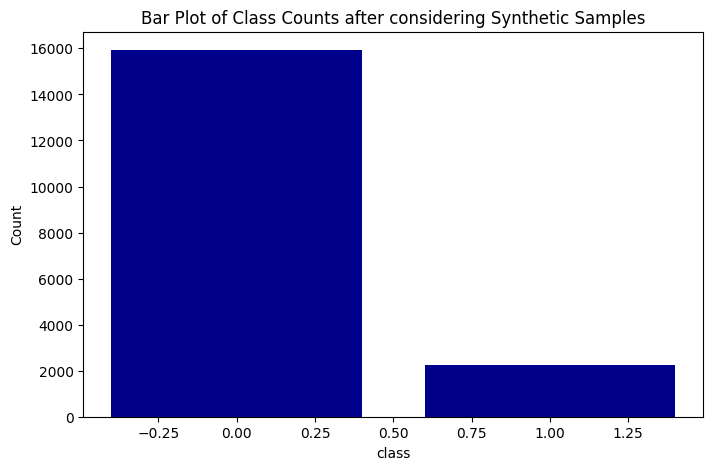

In [138]:
# Calculate counts for each category
class_counts = y_resampled.value_counts()

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values, color='darkblue')
plt.xlabel('class')
plt.ylabel('Count')
plt.title('Bar Plot of Class Counts after considering Synthetic Samples')
plt.show()

In [71]:
# model building

In [84]:
X

,V12,V10,V14,V11,V17,V4,V3,V9,V16,V7
0,0.293438,0.637735,0.549020,-0.987020,0.512307,-0.083724,2.496266,0.727159,0.215598,0.519014
1,1.564246,0.529808,0.627719,0.140107,0.403810,-0.429654,0.558056,0.347452,0.789188,0.406466
2,0.659201,0.690708,0.616874,-0.272985,0.886526,-0.457986,1.728538,-0.261297,-0.577514,0.743511
3,0.737483,0.575231,0.559535,-0.752581,0.242629,-1.090178,1.746840,-0.205698,-0.030669,0.518269
4,1.029577,0.968046,0.241454,-1.203171,0.366466,-0.448293,1.527053,1.049921,0.224538,0.658849
...,...,...,...,...,...,...,...,...,...,...
15995,0.771814,0.484971,0.561107,-0.652455,0.438588,-0.332018,0.630849,0.516110,0.802594,0.463274
15996,0.851023,0.622000,0.720220,-0.875824,0.387817,-0.182187,1.365015,0.211455,0.124395,0.425372
15997,0.957595,0.486028,0.726077,-0.103651,0.564989,-0.552236,1.214826,1.346437,0.356728,0.157385
15998,0.570478,0.579548,0.948808,-0.843120,0.326410,-0.354546,0.738830,0.600396,0.696648,0.438165


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [107]:
# Feature Scaling: performed cross validation

In [108]:
#trying with different oversampling methods

In [96]:
#random sampling

In [131]:

# Convert X and y to NumPy arrays if they are pandas DataFrames
X = X.values if hasattr(X, 'values') else X
y = y.values if hasattr(y, 'values') else y

# Initialize your model
model = RandomForestClassifier()  # Replace with your model

# Set up stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform random oversampling on the minority class
def random_oversample(X, y):
    # Separate majority and minority classes
    X_minority = X[y == 1]
    y_minority = y[y == 1]
    X_majority = X[y == 0]
    y_majority = y[y == 0]
    
    # Calculate how many times we need to duplicate the minority samples
    n_minority_to_add = len(y_majority) - len(y_minority)
    X_oversampled = np.concatenate([X_majority, X_minority, X_minority[:n_minority_to_add]], axis=0)
    y_oversampled = np.concatenate([y_majority, y_minority, y_minority[:n_minority_to_add]], axis=0)
    
    return X_oversampled, y_oversampled

# Initialize lists to store the results for each fold
precision_scores, recall_scores, f1_scores = [], [], []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Apply random oversampling to training data
    X_train_res, y_train_res = random_oversample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_res, y_train_res)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate precision, recall, f1-score for each fold
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_scores.append(report['1']['precision'])
    recall_scores.append(report['1']['recall'])
    f1_scores.append(report['1']['f1-score'])

# Calculate the average scores across all folds
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1:.4f}")

Average Precision: 0.9607
Average Recall: 0.8781
Average F1-Score: 0.9145


In [90]:
#SMOTE

In [134]:
# Define a custom SMOTE-like oversampling function
def custom_smote(X, y, n_samples_per_instance=30):
    minority_class = 1  # Assuming the minority class is labeled as 1
    minority_indices = np.where(y == minority_class)[0]
    majority_indices = np.where(y == 0)[0]
    
    X_minority = X[minority_indices]
    y_minority = y[minority_indices]

    # List to store new synthetic samples
    synthetic_samples = []
    synthetic_labels = []
    
    for instance in X_minority:
        for _ in range(n_samples_per_instance):
            # Randomly pick another minority sample
            random_sample = X_minority[np.random.randint(0, len(X_minority))]
            
            # Generate a synthetic sample by interpolation
            synthetic_sample = instance + np.random.rand() * (random_sample - instance)
            synthetic_samples.append(synthetic_sample)
            synthetic_labels.append(minority_class)
    
    # Concatenate the original data with synthetic samples
    X_resampled = np.vstack((X, synthetic_samples))
    y_resampled = np.concatenate((y, synthetic_labels))
    
    return X_resampled, y_resampled

# Initialize cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
precision_scores, recall_scores, f1_scores, accuracy_scores = [], [], [], []

for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply custom SMOTE on the training set
    X_resampled, y_resampled = custom_smote(X_train, y_train, n_samples_per_instance=20)

    # Train the model
    model = RandomForestClassifier()
    model.fit(X_resampled, y_resampled)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append scores for each fold
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

# Calculate average metrics across all folds
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_accuracy = np.mean(accuracy_scores)

print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1:.4f}")


Average Precision: 0.9283
Average Recall: 0.9124
Average F1-Score: 0.9153


In [99]:
##RANDOM FOREST IS PERFORMING WELL ON MY DATA WHERE MY DATA INCLUDES IMBALANCED DATA

In [100]:
# TRYING WITH DIFFERENT MODELS

In [102]:
#logistic regression

In [103]:
# Define a custom SMOTE-like oversampling function
def custom_smote(X, y, n_samples_per_instance=20):
    minority_class = 1  # Assuming the minority class is labeled as 1
    minority_indices = np.where(y == minority_class)[0]
    majority_indices = np.where(y == 0)[0]
    
    X_minority = X[minority_indices]
    y_minority = y[minority_indices]

    # List to store new synthetic samples
    synthetic_samples = []
    synthetic_labels = []
    
    for instance in X_minority:
        for _ in range(n_samples_per_instance):
            # Randomly pick another minority sample
            random_sample = X_minority[np.random.randint(0, len(X_minority))]
            
            # Generate a synthetic sample by interpolation
            synthetic_sample = instance + np.random.rand() * (random_sample - instance)
            synthetic_samples.append(synthetic_sample)
            synthetic_labels.append(minority_class)
    
    # Concatenate the original data with synthetic samples
    X_resampled = np.vstack((X, synthetic_samples))
    y_resampled = np.concatenate((y, synthetic_labels))
    
    return X_resampled, y_resampled

# Initialize cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
precision_scores, recall_scores, f1_scores, accuracy_scores = [], [], [], []

for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply custom SMOTE on the training set
    X_resampled, y_resampled = custom_smote(X_train, y_train, n_samples_per_instance=20)

    # Train the model
    model = LogisticRegression()
    model.fit(X_resampled, y_resampled)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append scores for each fold
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

# Calculate average metrics across all folds
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_accuracy = np.mean(accuracy_scores)

print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1:.4f}")

Average Precision: 0.6679
Average Recall: 0.9092
Average F1-Score: 0.7606


In [104]:
#SVM

In [106]:
# Define a custom SMOTE-like oversampling function
def custom_smote(X, y, n_samples_per_instance=20):
    minority_class = 1  # Assuming the minority class is labeled as 1
    minority_indices = np.where(y == minority_class)[0]
    majority_indices = np.where(y == 0)[0]
    
    X_minority = X[minority_indices]
    y_minority = y[minority_indices]

    # List to store new synthetic samples
    synthetic_samples = []
    synthetic_labels = []
    
    for instance in X_minority:
        for _ in range(n_samples_per_instance):
            # Randomly pick another minority sample
            random_sample = X_minority[np.random.randint(0, len(X_minority))]
            
            # Generate a synthetic sample by interpolation
            synthetic_sample = instance + np.random.rand() * (random_sample - instance)
            synthetic_samples.append(synthetic_sample)
            synthetic_labels.append(minority_class)
    
    # Concatenate the original data with synthetic samples
    X_resampled = np.vstack((X, synthetic_samples))
    y_resampled = np.concatenate((y, synthetic_labels))
    
    return X_resampled, y_resampled

# Initialize cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
precision_scores, recall_scores, f1_scores, accuracy_scores = [], [], [], []

for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply custom SMOTE on the training set
    X_resampled, y_resampled = custom_smote(X_train, y_train, n_samples_per_instance=20)

    # Train the model
    model = SVC()
    model.fit(X_resampled, y_resampled)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Append scores for each fold
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

# Calculate average metrics across all folds
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_accuracy = np.mean(accuracy_scores)

print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1:.4f}")

Average Precision: 0.7256
Average Recall: 0.8981
Average F1-Score: 0.7916
